In [382]:
#install.packages(c("FactoMineR", "factoextra"))
library("FactoMineR")
library("factoextra")
library(readxl)
library(dplyr)
library(psych)
#install.packages("GPArotation")
library(GPArotation)
#install.packages("psy")
library(psy)
#install.packages("nFactors")
library(nFactors)
library(mvtnorm) # col.norm
library(tilting) # col.norm
library(corrplot)
library(writexl)

Warning message:
"package 'writexl' was built under R version 4.0.3"


In [296]:
df.wa <- read_excel("../../results/df-water-access.xlsx",sheet=1)
summary(df.wa)
colnames(df.wa)
str(df.wa)
head(df.wa, 7)

   Country               phom            pipy            ptap      
 Length:73          Min.   : 0.00   Min.   : 0.00   Min.   : 0.00  
 Class :character   1st Qu.: 2.70   1st Qu.: 3.30   1st Qu.: 3.00  
 Mode  :character   Median : 8.30   Median : 6.60   Median :10.30  
                    Mean   :18.31   Mean   :11.59   Mean   :12.01  
                    3rd Qu.:25.40   3rd Qu.:19.70   3rd Qu.:17.70  
                    Max.   :90.60   Max.   :54.10   Max.   :57.70  
      bore            pwel             pspr             rain       
 Min.   : 0.00   Min.   : 0.000   Min.   : 0.000   Min.   : 0.000  
 1st Qu.: 0.60   1st Qu.: 1.500   1st Qu.: 0.100   1st Qu.: 0.000  
 Median : 5.70   Median : 4.100   Median : 0.800   Median : 0.300  
 Mean   :13.43   Mean   : 6.747   Mean   : 3.342   Mean   : 2.742  
 3rd Qu.:22.90   3rd Qu.: 9.000   3rd Qu.: 4.200   3rd Qu.: 1.700  
 Max.   :86.40   Max.   :48.100   Max.   :47.900   Max.   :46.700  
      uwel             uspr             truc    

[1] "Country" "phom"    "pipy"    "ptap"    "bore"    "pwel"    "pspr"   
 [8] "rain"    "uwel"    "uspr"    "truc"    "ctan"    "bott"    "othw"   
[15] "surw"    "tles"    "tmor"    "watp"

tibble [73 x 18] (S3: tbl_df/tbl/data.frame)
 $ Country: chr [1:73] "Afghanistan" "Albania" "Angola" "Armenia" ...
 $ phom   : num [1:73] 2.3 48.8 4.3 88.3 34 4.3 5.1 24.6 2.6 1.1 ...
 $ pipy   : num [1:73] 4.8 5.2 9.7 8 19.7 3.3 4.2 54.1 9.6 5 ...
 $ ptap   : num [1:73] 14.2 2.4 10.3 0.5 3.5 2.7 13 5.3 18.4 24 ...
 $ bore   : num [1:73] 20.1 1.4 1.9 0.2 9.3 86.4 28.9 0 40.6 0.6 ...
 $ pwel   : num [1:73] 18.5 4.1 9.1 0.2 6.2 0.2 4.4 1.7 9 1.8 ...
 $ pspr   : num [1:73] 4.7 2.5 3.3 1 7.5 0 0.3 0 0.2 47.9 ...
 $ rain   : num [1:73] 0.4 0 1.7 0 0 0.4 0.4 0 0 0 ...
 $ uwel   : num [1:73] 11.1 0.8 8.3 0 0.2 0.6 20.8 6.2 16.3 1.7 ...
 $ uspr   : num [1:73] 8.6 0.8 4.8 0.1 1.1 0.3 1.2 0 1.5 10.9 ...
 $ truc   : num [1:73] 1.5 14.1 9.7 1.5 9.5 0 0.2 1.7 0 0 ...
 $ ctan   : num [1:73] 4.4 0.2 4.3 0 0.7 0.1 0.3 0 0.2 0 ...
 $ bott   : num [1:73] 0.2 19.6 1.2 0 0.1 0.3 0 0 0.2 0.1 ...
 $ othw   : num [1:73] 1.7 0.1 1.8 0 1.1 0.1 0.4 0.9 0.5 0.1 ...
 $ surw   : num [1:73] 7.3 0 18 0 7 1.2 5.8 5.2

Country,phom,pipy,ptap,bore,pwel,pspr,rain,uwel,uspr,truc,ctan,bott,othw,surw,tles,tmor,watp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2.3,4.8,14.2,20.1,18.5,4.7,0.4,11.1,8.6,1.5,4.4,0.2,1.7,7.3,45.2,8.2,45.3
Albania,48.8,5.2,2.4,1.4,4.1,2.5,0.0,0.8,0.8,14.1,0.2,19.6,0.1,0.0,20.6,1.1,77.9
Angola,4.3,9.7,10.3,1.9,9.1,3.3,1.7,8.3,4.8,9.7,4.3,1.2,1.8,18.0,46.1,15.6,34.5
Armenia,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.0,0.1,1.5,0.0,0.0,0.0,0.0,1.6,0.1,97.6
Azerbaijan,34.0,19.7,3.5,9.3,6.2,7.5,0.0,0.2,1.1,9.5,0.7,0.1,1.1,7.0,18.7,4.4,75.9
Bangladesh,4.3,3.3,2.7,86.4,0.2,0.0,0.4,0.6,0.3,0.0,0.1,0.3,0.1,1.2,22.7,1.6,75.5
Benin,5.1,4.2,13.0,28.9,4.4,0.3,0.4,20.8,1.2,0.2,0.3,0.0,0.4,5.8,49.8,12.1,37.4


The goal of this study is to analyze the characteristics of the water accessibility variables.

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     2.1306056 1.3634837 1.29778602 1.19416869 1.09637759
Proportion of Variance 0.2670282 0.1093581 0.09907344 0.08388464 0.07070846
Cumulative Proportion  0.2670282 0.3763863 0.47545978 0.55934442 0.63005288
                           Comp.6     Comp.7     Comp.8    Comp.9    Comp.10
Standard deviation     0.99851459 0.99230650 0.95128241 0.9075667 0.80357634
Proportion of Variance 0.05864891 0.05792189 0.05323166 0.0484516 0.03798441
Cumulative Proportion  0.68870179 0.74662368 0.79985534 0.8483069 0.88629135
                          Comp.11    Comp.12    Comp.13    Comp.14    Comp.15
Standard deviation     0.68852496 0.64449468 0.59008870 0.52902160 0.47384234
Proportion of Variance 0.02788627 0.02443373 0.02048263 0.01646258 0.01320745
Cumulative Proportion  0.91417762 0.93861135 0.95909398 0.97555656 0.98876400
                           Comp.16     Comp.17
Sta


Loadings:
     Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9 Comp.10
phom  0.321  0.105  0.150  0.112  0.414                0.287  0.259  0.217 
pipy         0.425  0.299        -0.441 -0.129  0.142  0.177 -0.302        
ptap -0.265  0.382  0.234        -0.138         0.226 -0.238               
bore -0.136 -0.418  0.155 -0.367        -0.299 -0.333 -0.208  0.164 -0.317 
pwel -0.178 -0.337  0.118  0.324  0.107  0.148  0.397  0.296        -0.357 
pspr -0.166  0.326 -0.425         0.271 -0.116  0.200 -0.107        -0.317 
rain  0.120        -0.320        -0.364  0.676 -0.162 -0.151 -0.138 -0.161 
uwel -0.279 -0.277  0.247  0.169         0.193  0.115 -0.131         0.508 
uspr -0.255  0.198 -0.446                              0.229  0.141  0.134 
truc                       0.531  0.249 -0.104 -0.369 -0.312 -0.496 -0.152 
ctan        -0.191 -0.235  0.431 -0.400 -0.434  0.244                      
bott  0.271 -0.176 -0.381        -0.114 -0.113  0.274 -0.278         0.301 
o

Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12,Comp.13,Comp.14,Comp.15,Comp.16,Comp.17
-1.2868468,-1.03663795,-0.61217110,2.50312436,-1.525216944,-1.27347180,0.66498052,0.146846337,1.47293884,-1.04253138,0.49504676,0.33759151,0.44482319,-0.59870956,0.58014984,-0.262345270,-0.15091285
2.8131857,0.12703295,-0.02071369,1.95600884,2.305370286,-0.66207155,-1.04070025,-1.145620599,-1.90001273,-0.14501096,-0.41849538,-0.03512015,0.63979743,-1.04387094,-0.79651029,0.598389482,0.73198933
-1.1537387,0.06555506,-0.89534684,4.41433483,-1.559080347,-1.35878272,-1.60021422,0.006613721,-0.38691754,-0.48998619,-0.02418597,0.98353323,0.01785605,0.33379182,-0.13112933,0.208028719,0.04723000
3.5437710,0.48733676,0.62306608,-0.28836146,2.091789959,0.05980695,-0.08918265,1.076487644,0.39074057,0.72996122,0.82043497,0.75974773,0.11451862,-0.31692970,0.76930121,0.319017780,-0.07250600
1.6112298,1.00924477,0.29320267,1.81872723,0.750967250,-0.78970444,-1.37677890,-0.051325217,-0.87624596,-1.07760362,0.01662261,-0.08943832,-0.62401715,-0.45542916,-0.08189944,0.085934413,0.38446336
0.7290469,-2.21050962,0.71995716,-2.68514757,0.316571798,-1.62213503,-1.76561108,-0.962100931,0.75259235,-1.51237270,0.69027153,-0.26117054,0.14662011,-0.04485031,0.51531961,-0.879776389,0.17860092
-1.4374051,-1.15564499,0.91096104,-0.42495019,-0.193147651,0.05235868,-0.38070925,-0.568790345,0.44411879,0.76603455,0.14484430,0.38001290,-0.39405390,-0.39639380,-0.35170256,-0.196103958,-0.20979303
2.0887771,2.00384250,1.75097862,-0.17378531,-1.522959344,-0.41381765,-0.06285404,1.033149312,-0.91012788,0.03405558,0.91926483,-1.09455482,-1.37709107,-0.17995280,-0.26057189,0.002125967,0.28999403
-2.3199042,-0.94211286,1.29461476,-0.58700390,0.241219352,0.21746489,0.36001891,-1.641803548,0.37252804,0.04645614,0.88580091,-0.33407803,-0.02158828,0.90998036,0.21366177,0.238691679,0.15020369
-3.3616414,3.19378576,-3.20042982,-1.03851878,2.170211230,-0.47424729,1.49086722,-1.131872376,0.37255344,-1.59230742,-0.37322626,1.53911585,-2.15377571,-0.56336844,-0.15216301,0.146263367,-0.04057106


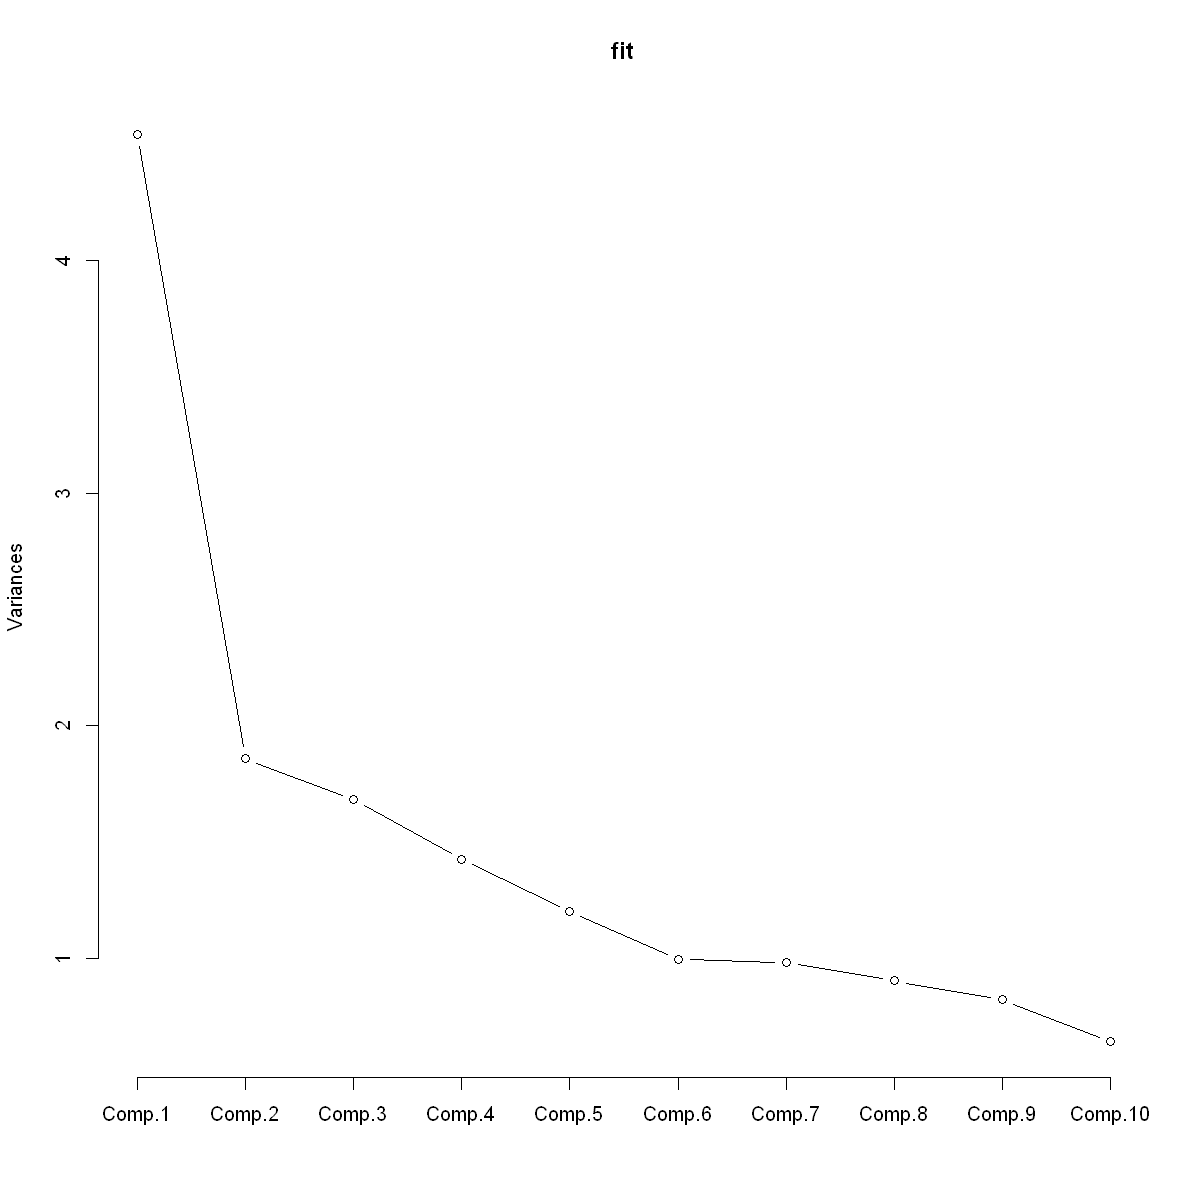

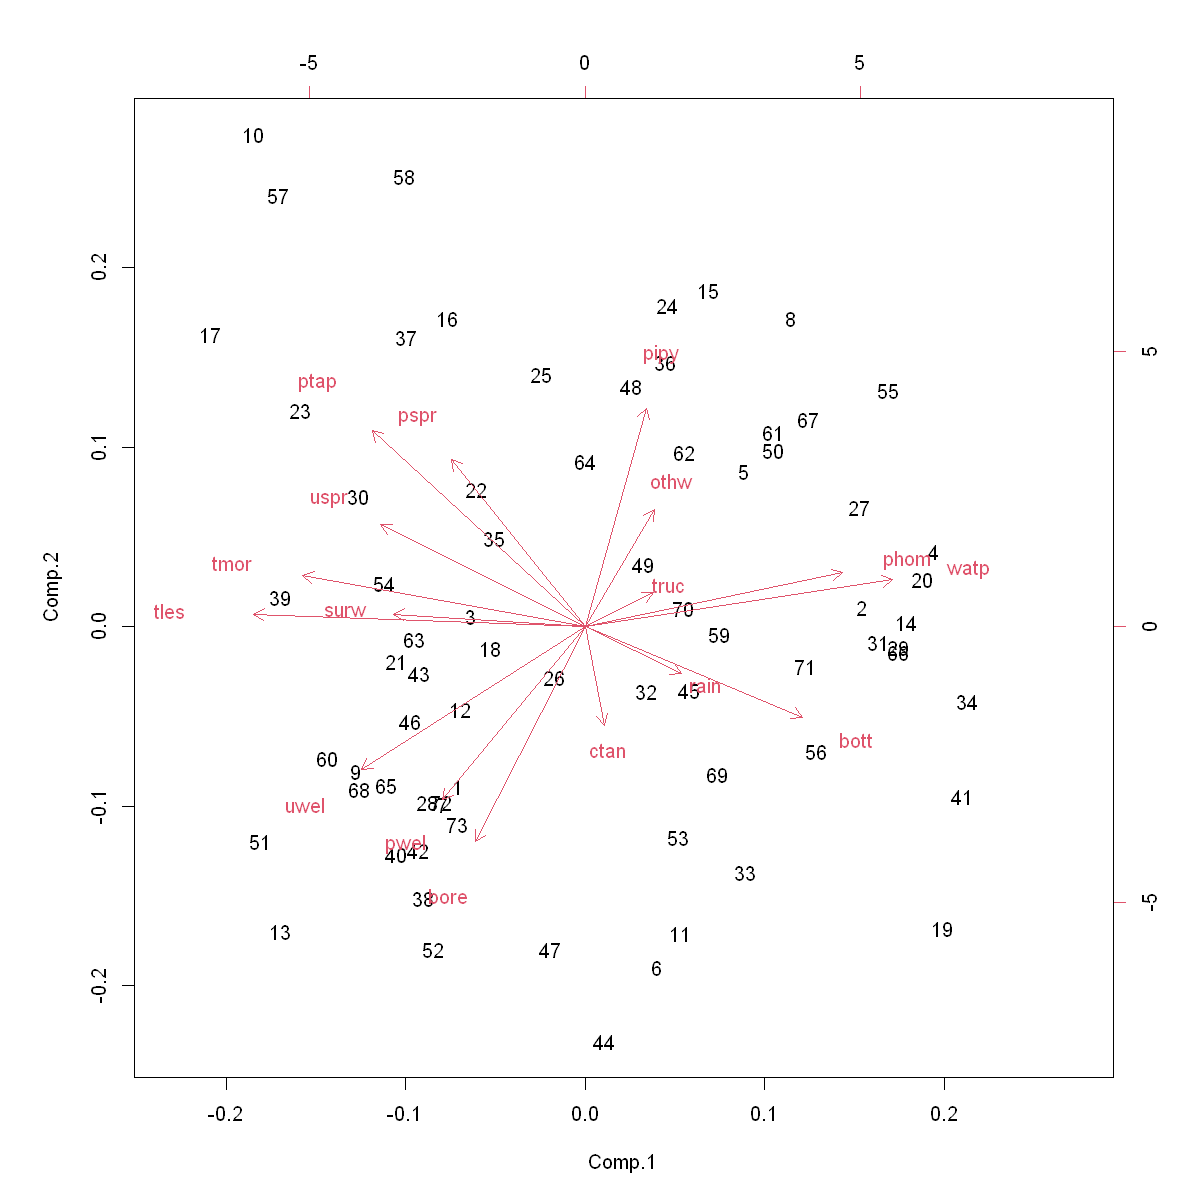

In [251]:
fit <- princomp(df.wa[,c(2:18)], cor=TRUE)
summary(fit) # print variance accounted for
loadings(fit) # pc loadings
plot(fit,type="lines") # scree plot
fit$scores # the principal components
biplot(fit )

In [253]:
# Varimax Rotated Principal Components
# retaining 7 components
fit <- principal(df.wa[,c(2:18)], nfactors=5, rotate="varimax")
fit # print results

Principal Components Analysis
Call: principal(r = df.wa[, c(2:18)], nfactors = 5, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
       RC1   RC3   RC5   RC4   RC2   h2   u2 com
phom -0.75 -0.16 -0.21  0.32 -0.13 0.75 0.25 1.7
pipy -0.08 -0.17 -0.07  0.14  0.84 0.76 0.24 1.2
ptap  0.44  0.20 -0.45  0.02  0.53 0.71 0.29 3.2
bore  0.26 -0.31 -0.09 -0.64 -0.23 0.64 0.36 2.2
pwel  0.48 -0.22 -0.14  0.13 -0.48 0.54 0.46 2.7
pspr  0.06  0.84 -0.08 -0.02 -0.01 0.72 0.28 1.0
rain -0.08  0.03  0.63 -0.12  0.09 0.43 0.57 1.2
uwel  0.69 -0.28 -0.22 -0.05 -0.20 0.65 0.35 1.8
uspr  0.36  0.76  0.05 -0.03 -0.05 0.71 0.29 1.4
truc -0.11 -0.03 -0.14  0.65 -0.25 0.52 0.48 1.5
ctan  0.30 -0.12  0.59  0.38 -0.14 0.62 0.38 2.5
bott -0.42  0.00  0.66 -0.01 -0.19 0.65 0.35 1.9
othw  0.01 -0.14  0.04  0.59  0.28 0.45 0.55 1.6
surw  0.58  0.24  0.13  0.10  0.03 0.42 0.58 1.5
tles  0.76  0.26 -0.27 -0.26  0.08 0.80 0.20 1.8
tmor  0.58  0.41 -0.37  0.05 -0.13 0.65 0.35 

sources: https://www.statmethods.net/advstats/factor.html

# Factor Analysis

sources: http://www.di.fc.ul.pt/~jpn/r/factoranalysis/factoranalysis.html

Factor analysis is a statistical method used to describe variability among observed, correlated variables in terms of a potentially lower number of unobserved variables called factors. […] Factor analysis searches for such joint variations in response to unobserved latent(*) variables.

test of 3 factors

In [297]:
df.wa.nocountry <- df.wa[,c(2:18)]

In [298]:
n.factors <- 5

fit <- factanal(df.wa.nocountry, 
                n.factors,                # number of factors to extract
                scores=c("regression"),
                rotation="none")

print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = df.wa.nocountry, factors = n.factors, scores = c("regression"),     rotation = "none")

Uniquenesses:
phom pipy ptap bore pwel pspr rain uwel uspr truc ctan bott othw surw tles tmor 
0.00 0.00 0.49 0.00 0.68 0.45 0.73 0.35 0.46 0.93 0.87 0.35 0.92 0.76 0.24 0.46 
watp 
0.38 

Loadings:
     Factor1 Factor2 Factor3 Factor4 Factor5
phom -0.69           -0.39   -0.60          
bore  0.86           -0.51                  
tles  0.56    0.56                          
ptap          0.51            0.45          
bott         -0.74                          
tmor  0.33    0.51    0.38                  
watp -0.42   -0.54   -0.35                  
pipy -0.50           -0.32    0.81          
pspr                  0.40            0.59  
uwel  0.36    0.42                   -0.54  
pwel                                 -0.40  
rain         -0.46                          
uspr          0.31    0.48            0.43  
truc                                        
ctan              

test of 2 factors

In [299]:
n.factors <- 5

fit.five <- factanal(df.wa.nocountry, 
                n.factors,                # number of factors to extract
                scores=c("regression"),
                rotation="varimax")

print(fit.five, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = df.wa.nocountry, factors = n.factors, scores = c("regression"),     rotation = "varimax")

Uniquenesses:
phom pipy ptap bore pwel pspr rain uwel uspr truc ctan bott othw surw tles tmor 
0.00 0.00 0.49 0.00 0.68 0.45 0.73 0.35 0.46 0.93 0.87 0.35 0.92 0.76 0.24 0.46 
watp 
0.38 

Loadings:
     Factor1 Factor2 Factor3 Factor4 Factor5
pwel  0.55                                  
uwel  0.80                                  
watp -0.62   -0.42                          
pspr          0.73                          
uspr          0.72                          
tles  0.51    0.52    0.42                  
tmor  0.49    0.51                          
phom -0.43   -0.42   -0.61   -0.33   -0.39  
bore                  0.92                  
pipy                          0.94          
rain                                  0.51  
bott -0.37                            0.64  
ptap  0.33    0.41            0.41          
truc                                        
ctan           

In [261]:
head(fit.five$scores , 7)

Factor1,Factor2,Factor3,Factor4,Factor5
0.7470027,0.1973553,0.3967041,-0.2880424,0.44956858
-0.6903956,-0.3991615,-0.9722968,-0.9573237,-0.02594064
0.8709086,0.5444659,-0.5020711,0.1510053,0.74224530
-1.3138045,-1.0388010,-1.6140997,-1.3026686,-1.93675775
-0.8350158,-0.3154518,-0.2549540,0.3815502,-0.49084568
-1.2863803,-1.4997721,3.9539518,-0.8366345,-0.82237113
1.1044384,-0.3234690,0.6469927,-0.3626824,-0.04795414


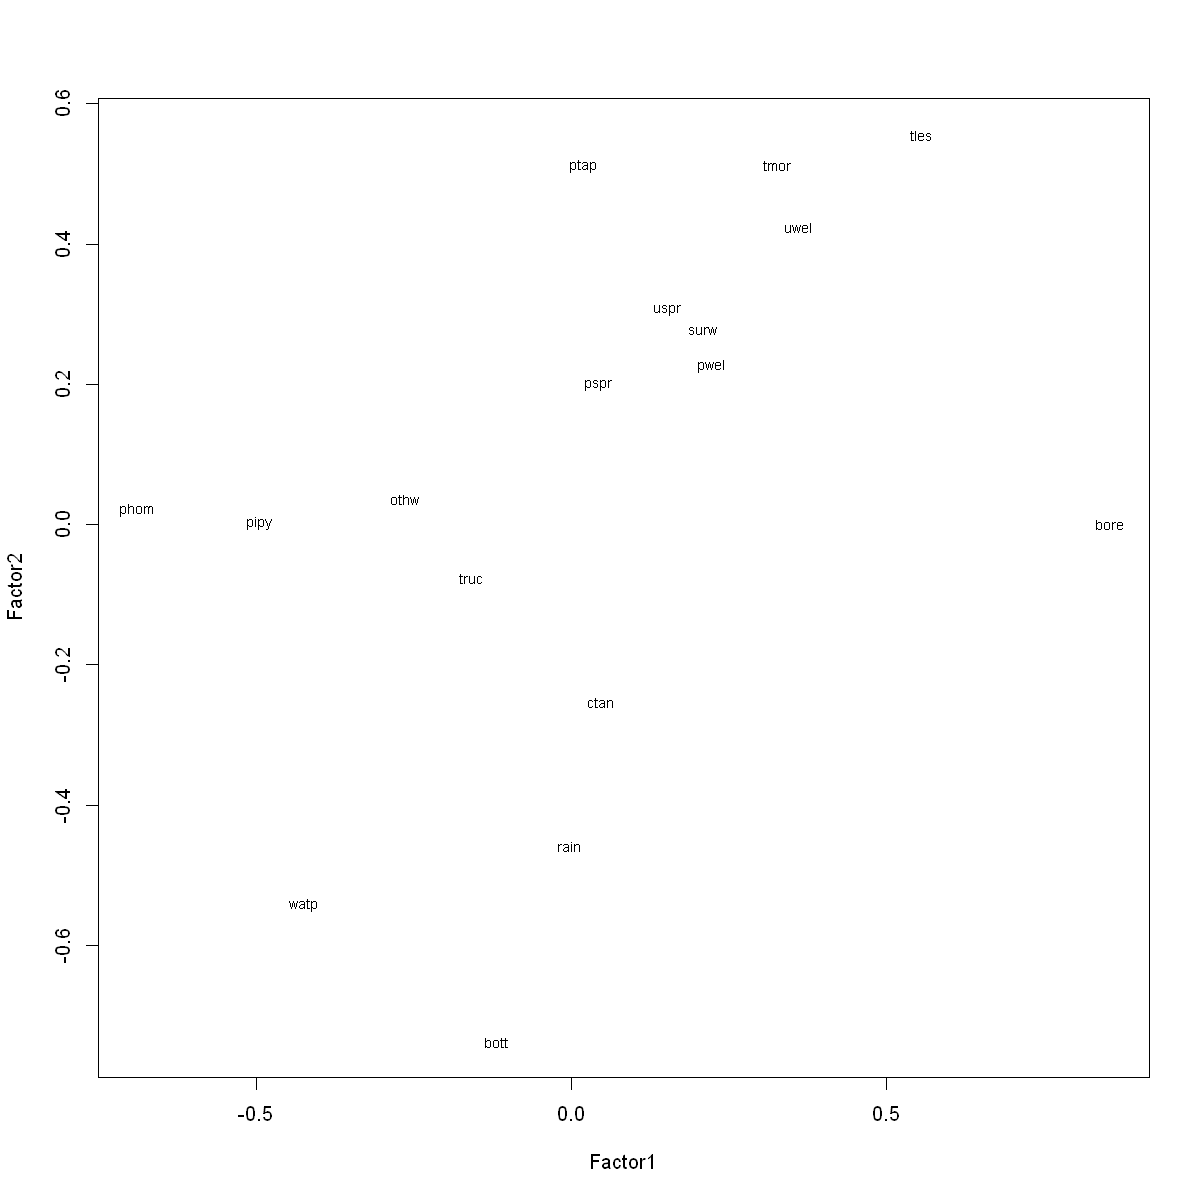

In [262]:
# plot factor 1 by factor 2 
load <- fit$loadings[,1:5] 
plot(load,type="n") # set up plot 
text(load,labels=names(df.wa),cex=.7) # add variable names

The output maximizes variance for the 1st and subsequent factors, while all are orthogonal to each other.

Rotation serves to make the output more understandable, by seeking so-called “Simple Structure”: A pattern of loadings where items load most strongly on one factor, and much more weakly on the other factors. Eg, varimax rotation is an orthogonal rotation of the factor axes to maximize the variance of the squared loadings of a factor (column) on all the variables (rows) in a factor matrix, which has the effect of differentiating the original variables by extracted factor. 

In [263]:
fit <- factanal(df.wa.nocountry, 
                n.factors,              # number of factors to extract
                rotation="varimax")     # 'varimax' is an ortho rotation

load <- fit$loadings[,1:5] 
head(load , 7)

,Factor1,Factor2,Factor3,Factor4,Factor5
phom,-0.4318065,-0.41916700,-0.610887395,-0.32940553,-0.38879655
pipy,-0.2303878,-0.13945423,-0.136385712,0.94196673,-0.12873904
ptap,0.3327327,0.41022371,-0.009715100,0.41450842,-0.24147417
bore,0.1234557,-0.23482504,0.919701050,-0.19952582,-0.19739805
pwel,0.5492434,-0.01707392,-0.014677080,-0.11890669,0.04256614
pspr,-0.1502696,0.72625854,0.005737832,-0.04365726,-0.03804646
rain,-0.1020958,-0.02448365,-0.037242482,-0.05101566,0.50974878


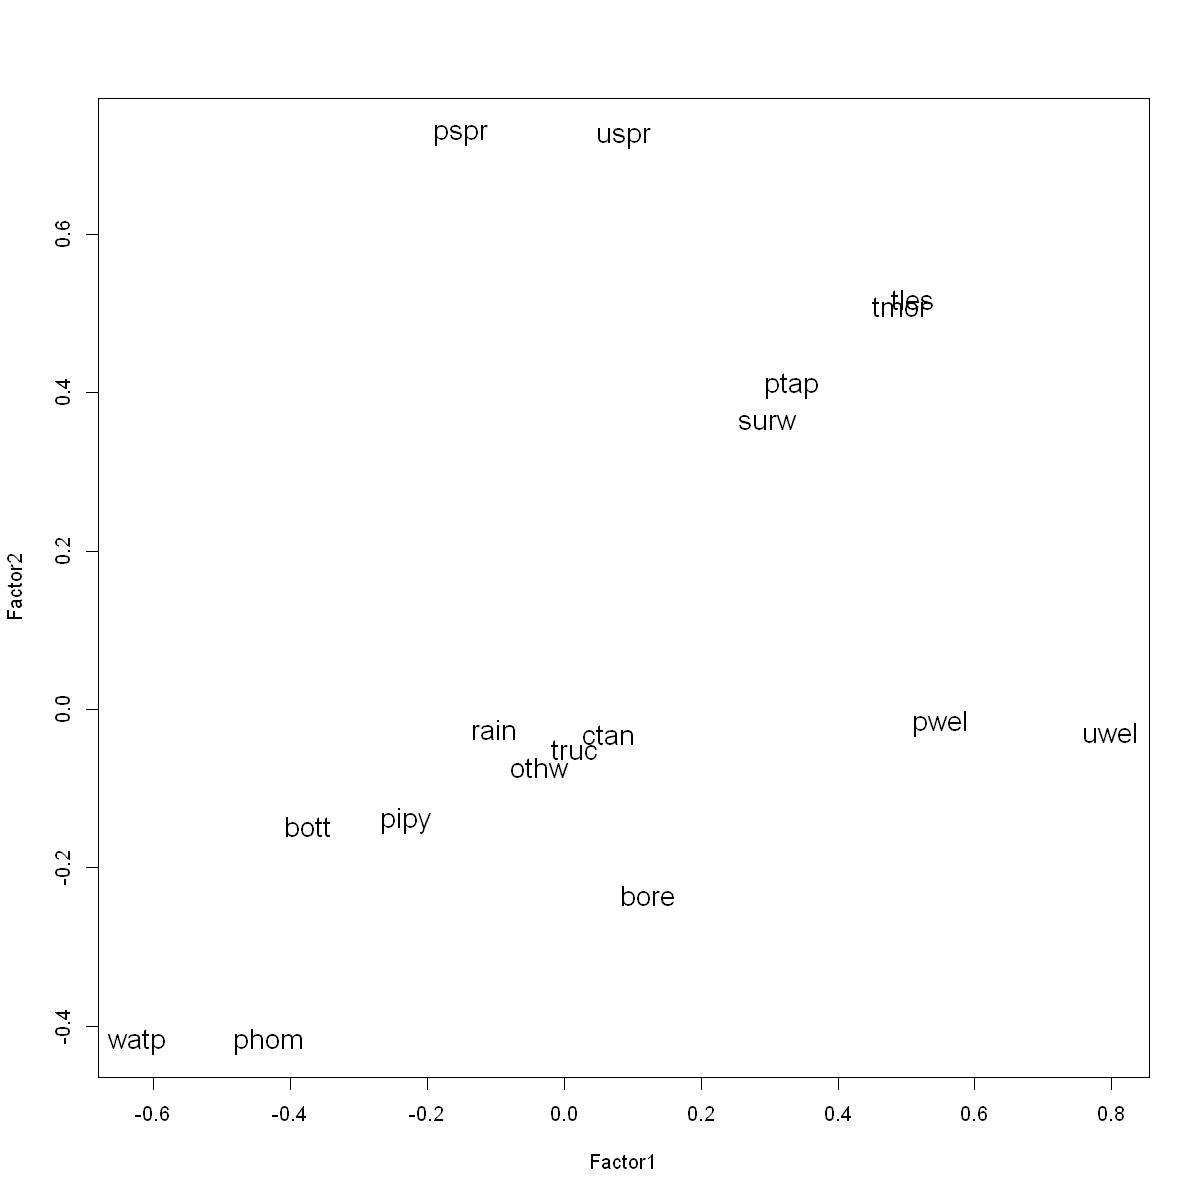

In [264]:
plot(load,type="n") # set up plot 
text(load,labels=names(df.wa),cex=1.4) # add variable names

Looking at both plots we see that iwsp, watp all have high factor loadings around 0.9 on the first factor (PA1) while tles, tmor, uiws load highly on the second factor (PA2). We could rename PA1 as prem, and PA2 as dist.

In [403]:
solution <- fa(r = cor(df.wa.nocountry), nfactors = 5, rotate = "oblimin", fm = "pa")

maximum iteration exceeded

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."
Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
"An ultra-Heywood case was detected.  Examine the results carefully"


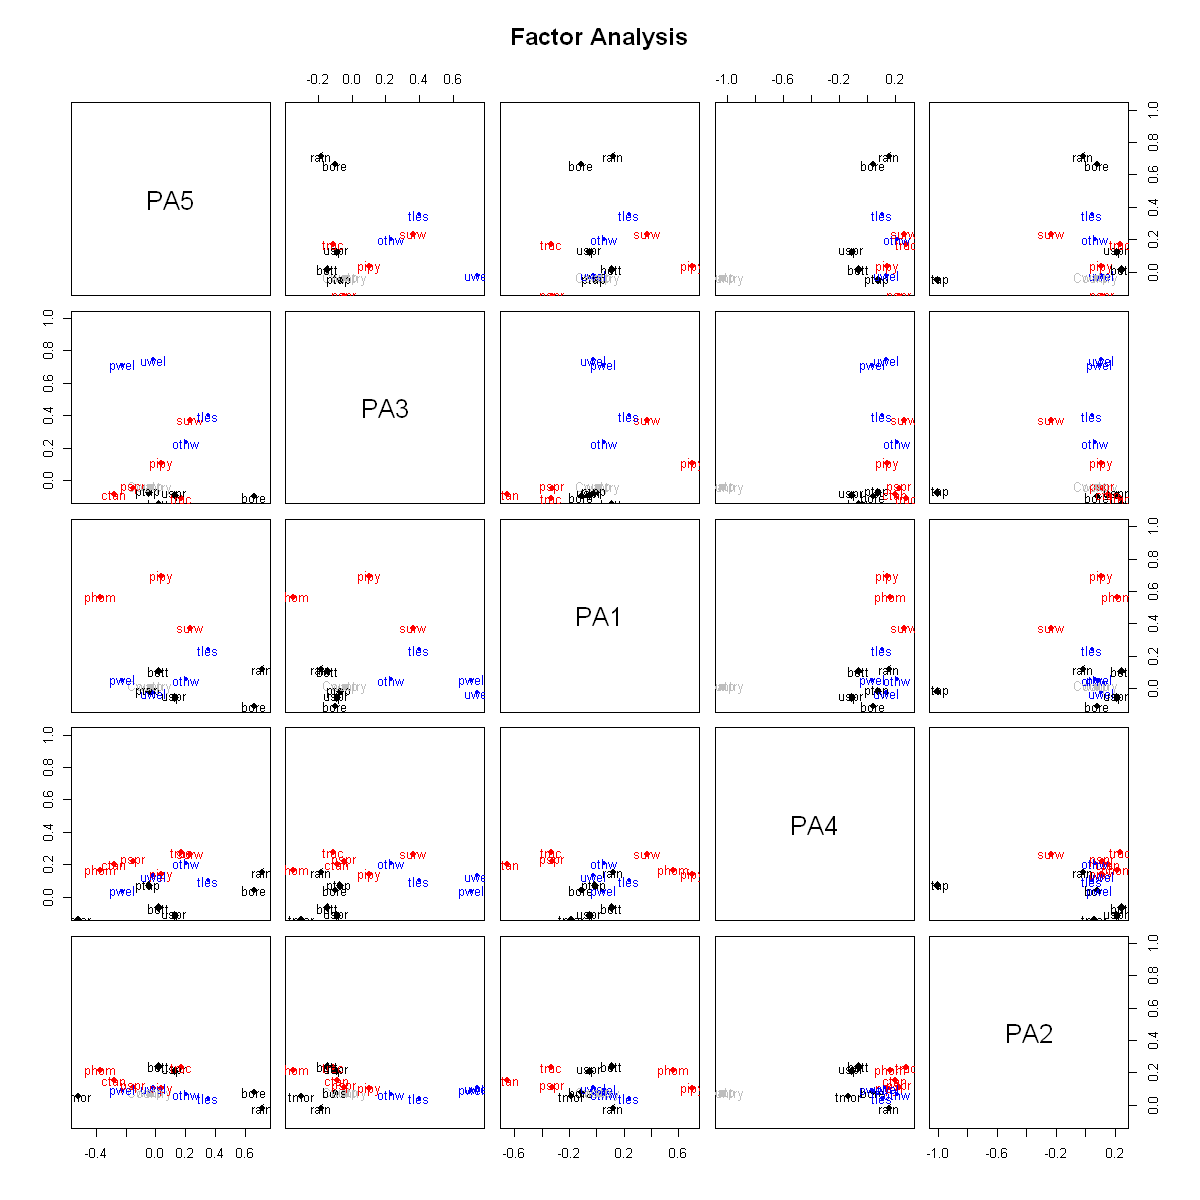

In [404]:
plot(solution,labels=names(df.wa),cex=1, ylim=c(-.1,1)) 

In [405]:
solution

Factor Analysis using method =  pa
Call: fa(r = cor(df.wa.nocountry), nfactors = 5, rotate = "oblimin", 
    fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
       PA5   PA3   PA1   PA4   PA2    h2    u2 com
phom -0.04 -0.04  0.01 -1.04  0.07 1.158 -0.16 1.0
pipy -0.37 -0.35  0.56  0.16  0.22 0.591  0.41 3.1
ptap  0.03  0.11  0.70  0.14  0.11 0.612  0.39 1.2
bore -0.05 -0.07 -0.01  0.07 -1.01 1.020 -0.02 1.0
pwel  0.66 -0.10 -0.11  0.04  0.08 0.387  0.61 1.1
pspr -0.23  0.71  0.05  0.03  0.09 0.498  0.50 1.3
rain -0.15 -0.05 -0.32  0.22  0.11 0.160  0.84 2.6
uwel  0.72 -0.18  0.12  0.15 -0.02 0.593  0.41 1.3
uspr -0.02  0.74 -0.03  0.13  0.11 0.610  0.39 1.1
truc  0.13 -0.09 -0.05 -0.11  0.21 0.077  0.92 2.9
ctan  0.17 -0.11 -0.33  0.28  0.23 0.176  0.82 3.7
bott -0.28 -0.09 -0.65  0.20  0.15 0.580  0.42 1.7
othw  0.02 -0.15  0.11 -0.07  0.24 0.099  0.90 2.3
surw  0.20  0.23  0.06  0.21  0.07 0.220  0.78 3.3
tles  0.23  0.37  0.37  0.26 -0.23 0.779  0.22

In [406]:
solution$score #Factors are not as correlated

1.0000000,0.4231766,0.17241470,0.44176442,-0.22418914
0.4231766,1.0000000,0.26656241,0.55504446,-0.12032007
0.1724147,0.2665624,1.00000000,0.08085881,-0.01370843
0.4417644,0.5550445,0.08085881,1.00000000,-0.34240043
-0.2241891,-0.1203201,-0.01370843,-0.34240043,1.00000000


In [398]:
solution$weight #df.wa multiply by 22 x 5 matrix
weight <- solution$weight

,PA1,PA2,PA3,PA4,PA5
phom,-0.464823738,-0.13381822,-1.016155468,1.11123689,-2.01435243
pipy,-0.148064364,-0.03181910,-0.667873159,-0.04323628,-0.74150194
ptap,0.007999165,0.01200179,-0.434588411,-0.09574889,-0.43328460
bore,-0.095977967,-0.97530029,-0.628704109,-0.09777168,-1.57801440
pwel,0.005962625,-0.16651796,-0.167584114,0.27744785,-0.14401073
pspr,0.004822766,0.02948612,0.064335866,0.01264193,-0.50519437
rain,-0.101640661,-0.06400382,-0.209687853,0.17690436,-0.51693245
uwel,0.058729725,-0.33421519,-0.279522011,0.25834511,-0.07186513
uspr,0.064125049,-0.05114190,0.131802366,0.07431154,-0.63586826
truc,-0.039831867,-0.13380439,-0.217613247,0.17778170,-0.43038711


In [399]:
print(solution$loading, digits=2, cutoff=.3, sort=TRUE) #sort out by the low numbers


Loadings:
     PA1   PA2   PA3   PA4   PA5  
phom -0.76              0.53 -0.43
ptap  0.54  0.42 -0.34            
uwel  0.56                        
uspr  0.51  0.32  0.46            
bott -0.54        0.49            
tles  0.87                        
tmor  0.70                        
watp -0.78                        
bore  0.32 -0.80       -0.34 -0.39
pipy        0.42 -0.41 -0.42      
pwel  0.34              0.39      
pspr  0.32  0.41  0.39            
rain                              
truc                              
ctan                          0.32
othw                              
surw  0.44                        

                PA1  PA2  PA3  PA4  PA5
SS loadings    4.20 1.53 1.22 0.98 0.81
Proportion Var 0.25 0.09 0.07 0.06 0.05
Cumulative Var 0.25 0.34 0.41 0.47 0.51


# New FA data frame

In [400]:
df.wa.nocountry <- df.wa[,c(2:18)]
df.wa.nocountry <- as.matrix(df.wa.nocountry)
df.wa.fa <- df.wa.nocountry %*% weight
df.wa.fa <- cbind(df.wa,df.wa.fa)
df.wa.fa <- df.wa.fa[,c(1,19:23)]
head(df.wa.fa,7)
summary(df.wa.fa)
write_xlsx(df.wa.fa, '../../results/df-wa-fa.xlsx')

,Country,PA1,PA2,PA3,PA4,PA5
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,3.336724,-5.622539,-33.31256,7.381594,-59.67392
2,Albania,-34.320173,1.013726,-52.35603,39.239470,-105.30958
3,Angola,4.252070,11.473608,-28.42489,16.089319,-43.80324
4,Armenia,-55.585914,4.573489,-80.18657,63.276701,-145.50580
5,Azerbaijan,-25.516700,1.987958,-50.06535,18.682856,-86.12770
6,Bangladesh,-15.430803,-65.694444,-55.50282,-24.023603,-127.75079
7,Benin,4.178303,-14.143562,-44.49060,11.923212,-74.85674


   Country               PA1               PA2               PA3          
 Length:73          Min.   :-55.586   Min.   :-65.694   Min.   :-80.8725  
 Class :character   1st Qu.:-24.361   1st Qu.:-14.144   1st Qu.:-52.3757  
 Mode  :character   Median : -4.564   Median :  1.014   Median :-46.2812  
                    Mean   :-10.379   Mean   : -3.015   Mean   :-43.9271  
                    3rd Qu.:  5.755   3rd Qu.:  8.082   3rd Qu.:-33.3126  
                    Max.   : 18.309   Max.   : 24.065   Max.   :  0.3911  
      PA4               PA5          
 Min.   :-25.321   Min.   :-151.487  
 1st Qu.:  6.758   1st Qu.: -97.767  
 Median : 16.022   Median : -74.857  
 Mean   : 17.406   Mean   : -79.250  
 3rd Qu.: 23.036   3rd Qu.: -60.483  
 Max.   : 69.475   Max.   :  -4.218  

# Determining the Number of Factors to Extract

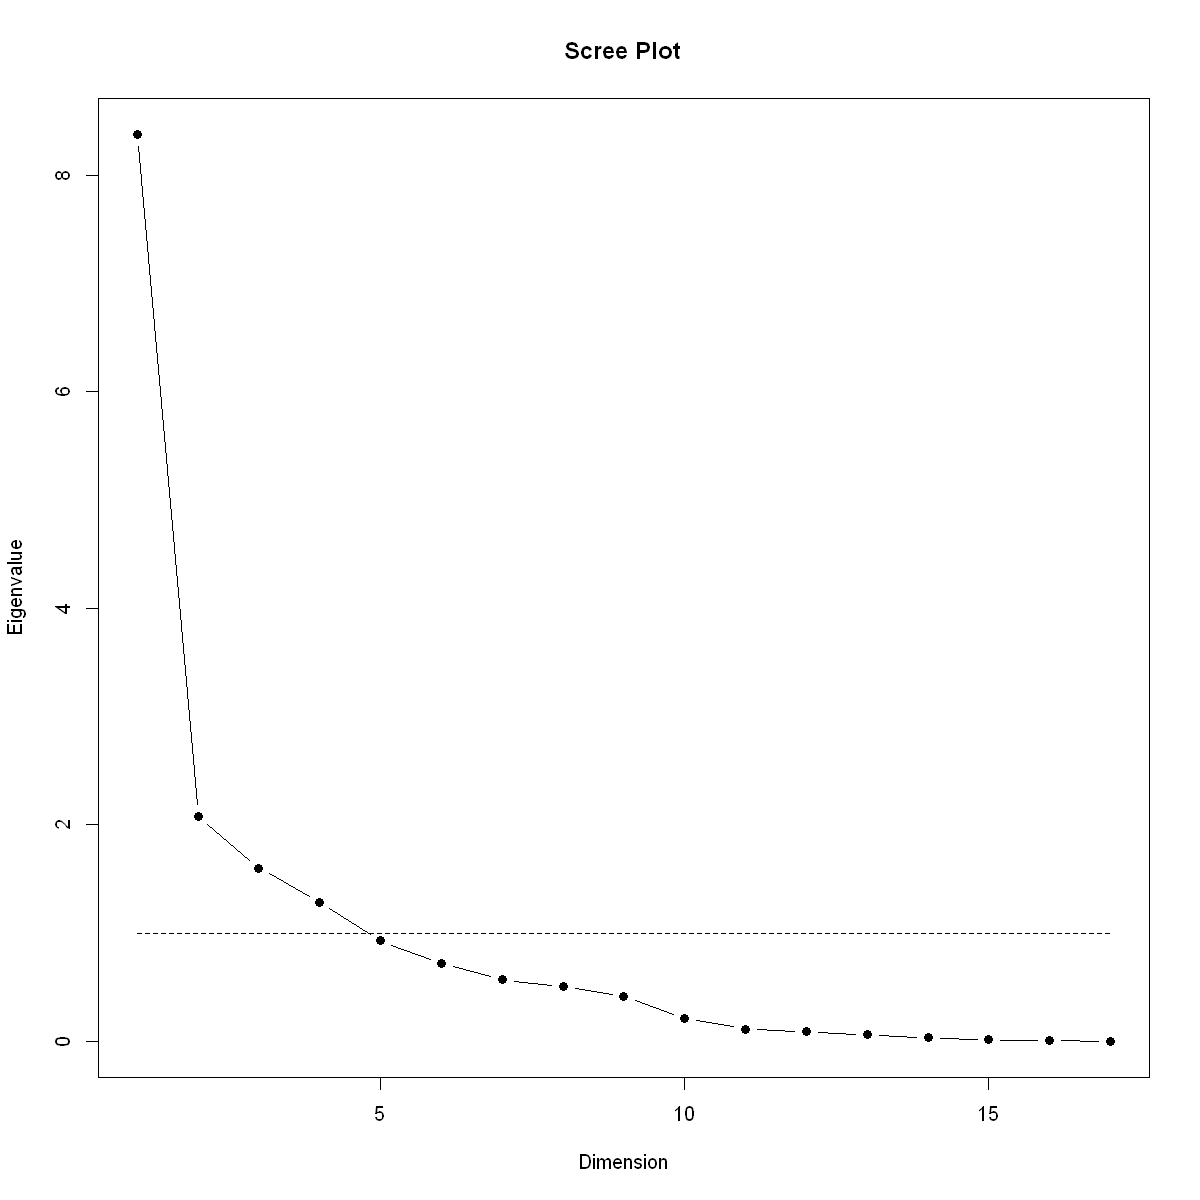

In [331]:
options(repr.plot.width=10, repr.plot.height=10)
scree.plot(fit$correlation)

simple = five factors

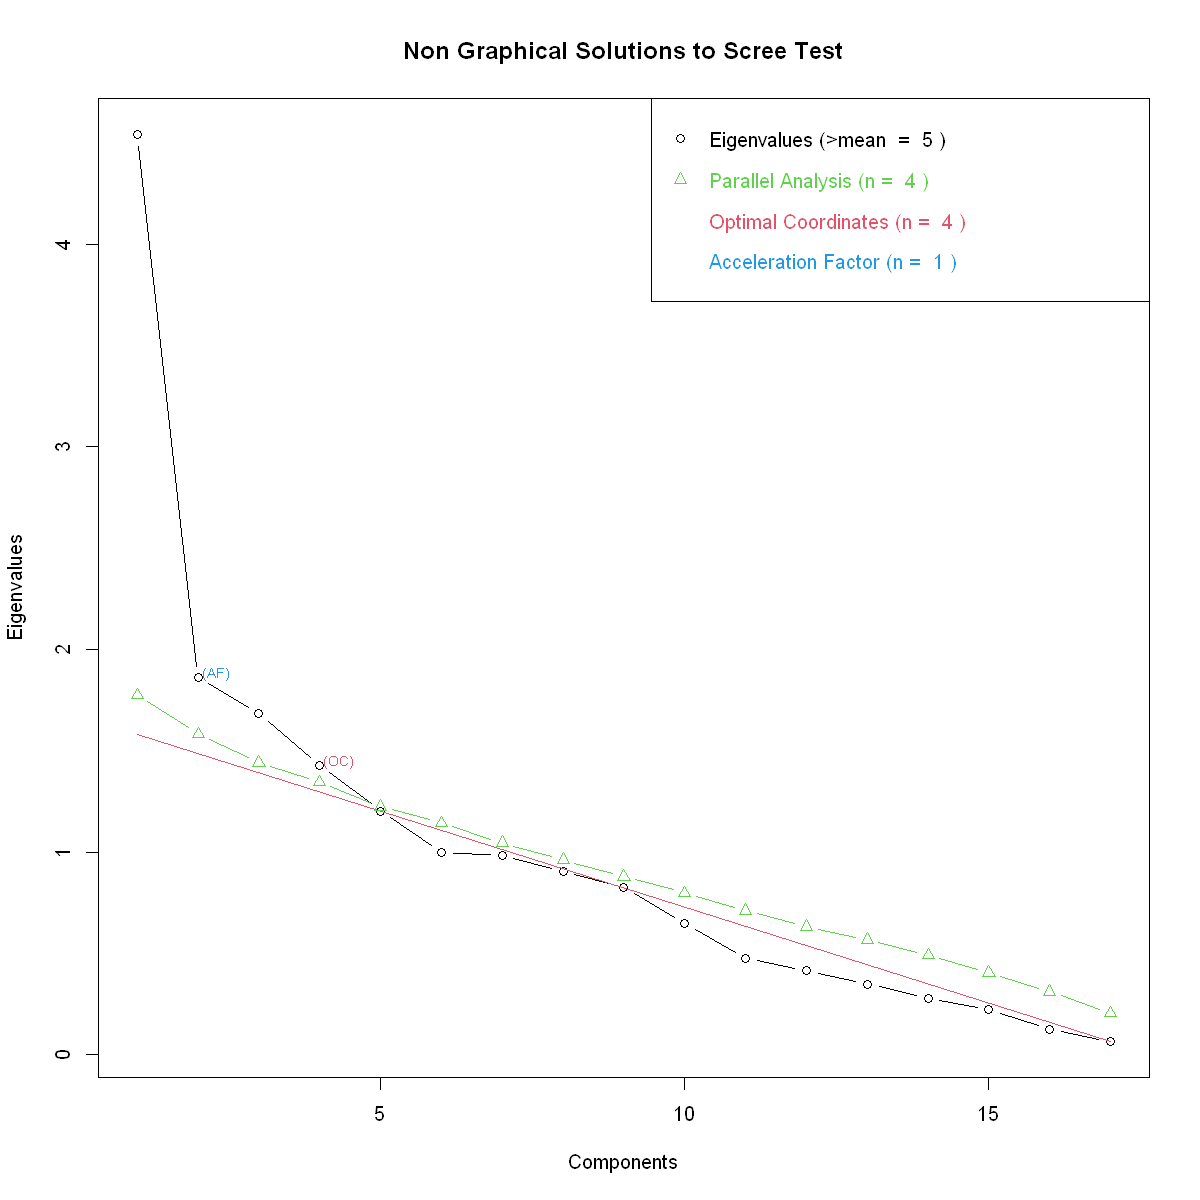

In [332]:
df.wa <- read_excel("../../results/df-water-access.xlsx",sheet=1)
df.wa.nocountry <- df.wa[,c(2:18)]

options(repr.plot.width=10, repr.plot.height=10)
ev <- eigen(cor(df.wa.nocountry)) # get eigenvalues
ap <- parallel(subject=nrow(df.wa.nocountry),var=ncol(df.wa.nocountry), rep=100, cent=.05)
nS <- nScree(x=ev$values, aparallel=ap$eigen$qevpea)
plotnScree(nS)


In [341]:
solution.obl <- fa(r = cor(df.wa.nocountry), nfactors = 5, rotate = "oblimin", fm = "pa")

maximum iteration exceeded

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."
Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
"An ultra-Heywood case was detected.  Examine the results carefully"


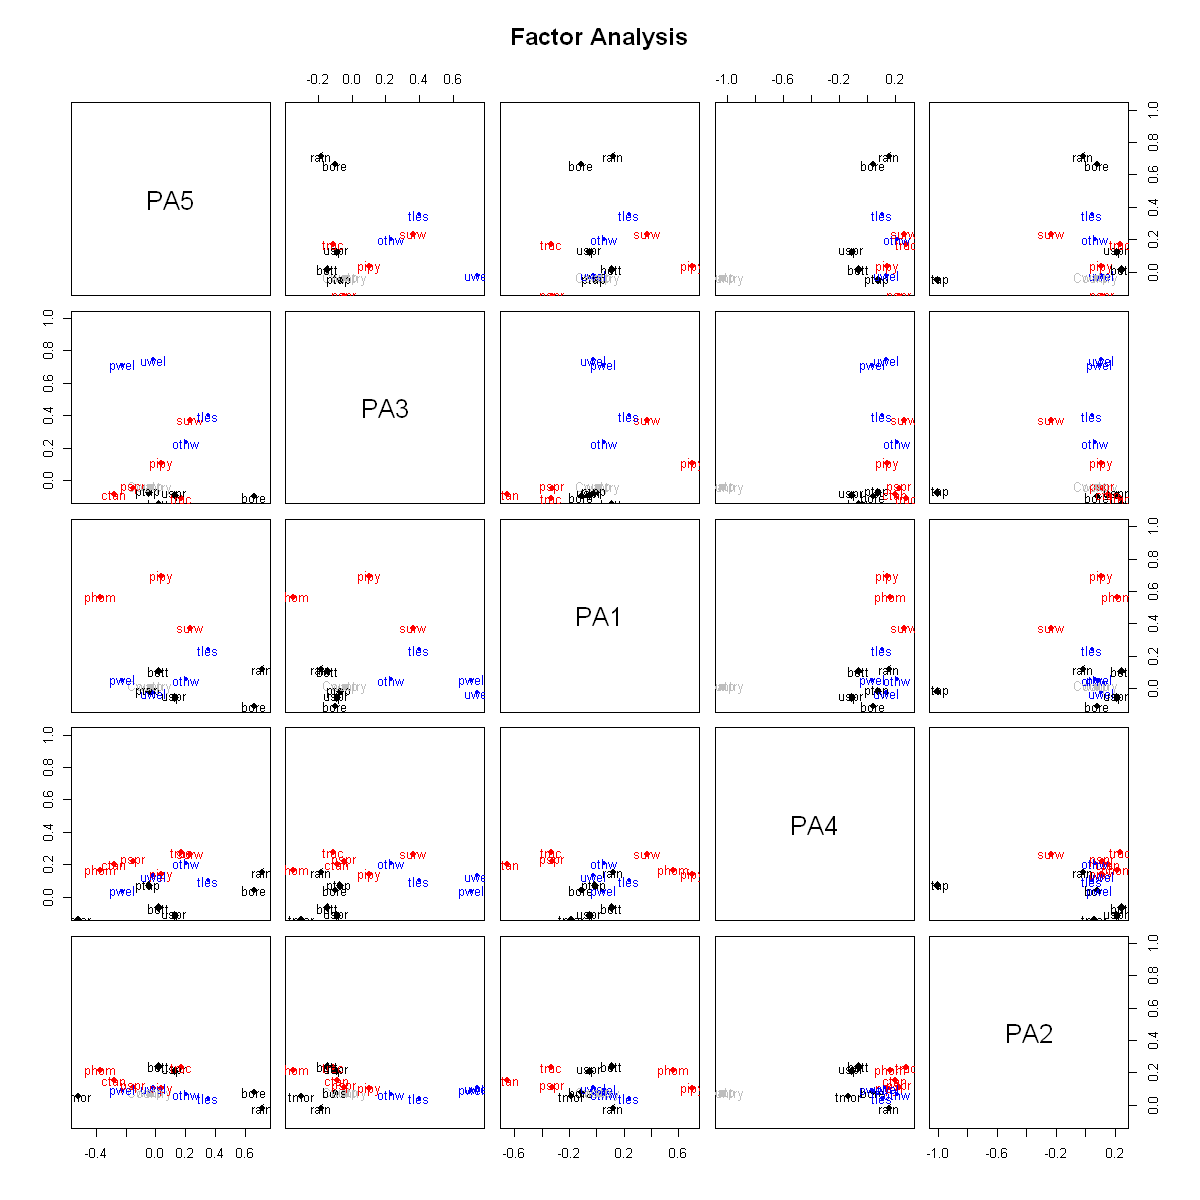

In [342]:
#options(repr.plot.width=15, repr.plot.height=15)
plot(solution.obl,labels=names(df.wa),cex=1, ylim=c(-.1,1)) 


In [343]:
solution.obl

Factor Analysis using method =  pa
Call: fa(r = cor(df.wa.nocountry), nfactors = 5, rotate = "oblimin", 
    fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
       PA5   PA3   PA1   PA4   PA2    h2    u2 com
phom -0.04 -0.04  0.01 -1.04  0.07 1.158 -0.16 1.0
pipy -0.37 -0.35  0.56  0.16  0.22 0.591  0.41 3.1
ptap  0.03  0.11  0.70  0.14  0.11 0.612  0.39 1.2
bore -0.05 -0.07 -0.01  0.07 -1.01 1.020 -0.02 1.0
pwel  0.66 -0.10 -0.11  0.04  0.08 0.387  0.61 1.1
pspr -0.23  0.71  0.05  0.03  0.09 0.498  0.50 1.3
rain -0.15 -0.05 -0.32  0.22  0.11 0.160  0.84 2.6
uwel  0.72 -0.18  0.12  0.15 -0.02 0.593  0.41 1.3
uspr -0.02  0.74 -0.03  0.13  0.11 0.610  0.39 1.1
truc  0.13 -0.09 -0.05 -0.11  0.21 0.077  0.92 2.9
ctan  0.17 -0.11 -0.33  0.28  0.23 0.176  0.82 3.7
bott -0.28 -0.09 -0.65  0.20  0.15 0.580  0.42 1.7
othw  0.02 -0.15  0.11 -0.07  0.24 0.099  0.90 2.3
surw  0.20  0.23  0.06  0.21  0.07 0.220  0.78 3.3
tles  0.23  0.37  0.37  0.26 -0.23 0.779  0.22

In [346]:
print(solution.obl$loading, digits=2, cutoff=.3, sort=TRUE)


Loadings:
     PA5   PA3   PA1   PA4   PA2  
pwel  0.66                        
uwel  0.72                        
watp -0.52                        
pspr        0.71                  
uspr        0.74                  
pipy -0.37 -0.35  0.56            
ptap              0.70            
bott             -0.65            
phom                   -1.04      
bore                         -1.01
rain             -0.32            
truc                              
ctan             -0.33            
othw                              
surw                              
tles        0.37  0.37            
tmor  0.35  0.40                  

                PA5  PA3  PA1  PA4  PA2
SS loadings    1.78 1.73 1.71 1.50 1.36
Proportion Var 0.10 0.10 0.10 0.09 0.08
Cumulative Var 0.10 0.21 0.31 0.39 0.47


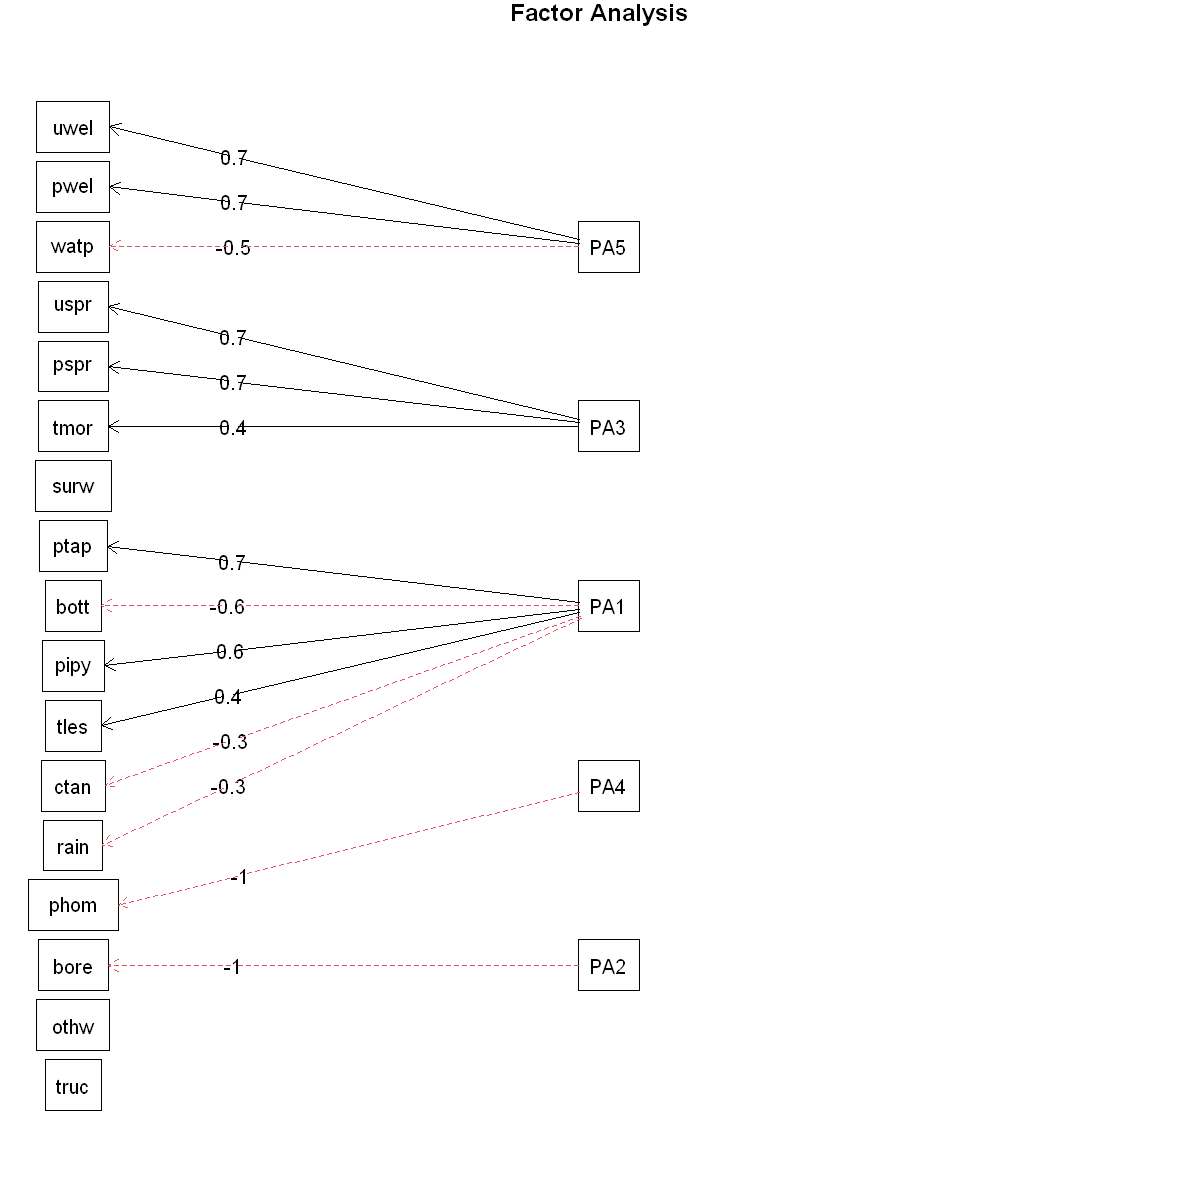

In [344]:
fa.diagram(solution.obl)

# FA

The goal of this study is to analyze the characteristics of water accessibility

sources: http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/115-famd-factor-analysis-of-mixed-data-in-r-essentials/

In [345]:
df.wa <- read_excel("../../results/df-water-access.xlsx",sheet=1)
str(df.wa)
df.wa <- as.numeric(df.wa)
head(df.wa, 7)


tibble [73 x 18] (S3: tbl_df/tbl/data.frame)
 $ Country: chr [1:73] "Afghanistan" "Albania" "Angola" "Armenia" ...
 $ phom   : num [1:73] 2.3 48.8 4.3 88.3 34 4.3 5.1 24.6 2.6 1.1 ...
 $ pipy   : num [1:73] 4.8 5.2 9.7 8 19.7 3.3 4.2 54.1 9.6 5 ...
 $ ptap   : num [1:73] 14.2 2.4 10.3 0.5 3.5 2.7 13 5.3 18.4 24 ...
 $ bore   : num [1:73] 20.1 1.4 1.9 0.2 9.3 86.4 28.9 0 40.6 0.6 ...
 $ pwel   : num [1:73] 18.5 4.1 9.1 0.2 6.2 0.2 4.4 1.7 9 1.8 ...
 $ pspr   : num [1:73] 4.7 2.5 3.3 1 7.5 0 0.3 0 0.2 47.9 ...
 $ rain   : num [1:73] 0.4 0 1.7 0 0 0.4 0.4 0 0 0 ...
 $ uwel   : num [1:73] 11.1 0.8 8.3 0 0.2 0.6 20.8 6.2 16.3 1.7 ...
 $ uspr   : num [1:73] 8.6 0.8 4.8 0.1 1.1 0.3 1.2 0 1.5 10.9 ...
 $ truc   : num [1:73] 1.5 14.1 9.7 1.5 9.5 0 0.2 1.7 0 0 ...
 $ ctan   : num [1:73] 4.4 0.2 4.3 0 0.7 0.1 0.3 0 0.2 0 ...
 $ bott   : num [1:73] 0.2 19.6 1.2 0 0.1 0.3 0 0 0.2 0.1 ...
 $ othw   : num [1:73] 1.7 0.1 1.8 0 1.1 0.1 0.4 0.9 0.5 0.1 ...
 $ surw   : num [1:73] 7.3 0 18 0 7 1.2 5.8 5.2

ERROR: Error in eval(expr, envir, enclos): 'list' object cannot be coerced to type 'double'


In [ ]:
res.famd <- FAMD(df.wa, graph = FALSE)
print(res.famd)

# Eigenvalues / Variances

In [ ]:
eig.val <- get_eigenvalue(res.famd)
head(eig.val)

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_screeplot(res.famd)

#  All variables

In [ ]:
var <- get_famd_var(res.famd)
var

In [ ]:
# Coordinates of variables
head(var$coord,7)
# Cos2: quality of representation on the factore map
head(var$cos2,7)
# Contributions to the  dimensions
head(var$contrib,7)

In [ ]:
# Plot of variables
fviz_famd_var(res.famd, repel = TRUE)
# Contribution to the first dimension
fviz_contrib(res.famd, "var", axes = 1)
# Contribution to the second dimension
fviz_contrib(res.famd, "var", axes = 2)

The red dashed line on the graph above indicates the expected average value, If the contributions were uniform.

From the plots above, it can be seen that:

variables that contribute the most to the first dimension are: iwsp and watp.

variables that contribute the most to the second dimension are: basw and ptap.

# Quantitative variables

In [ ]:
quanti.var <- get_famd_var(res.famd, "quanti.var")
quanti.var 

In [ ]:
fviz_famd_var(res.famd, "quanti.var", col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)

In [ ]:
# Color by cos2 values: quality on the factor map
fviz_famd_var(res.famd, "quanti.var", col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE)

# Graph of qualitative variables

In [ ]:
fviz_famd_var(res.famd, "quali.var", col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")
             )

# Graph of individuals

In [ ]:
ind <- get_famd_ind(res.famd)
ind

In [ ]:
fviz_famd_ind(res.famd, col.ind = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)

The factor analysis of mixed data (FAMD) makes it possible to analyze a data set, in which individuals are described by both qualitative and quantitative variables.

In [ ]:
result <- PCA(df.wa[,(2:18)])
result

# PCA

In [ ]:
head(df.wa.nocountry,7)

In [ ]:
# PCA Scree plot without standardizing data
hpca_dfsimple <- prcomp(df.wa.nocountry, scale=FALSE) # Scale to 0 to 1 # We can extract the information summarized above (and much more) # from the attributes of the object hpca_dfsimple

standard_deviation_of_each_component <- hpca_dfsimple$sdev
var_per_dim <- standard_deviation_of_each_component^2
var_tot <- sum(var_per_dim)
var_tot
var_per_dim/var_tot

var_prop <- var_per_dim / sum(var_per_dim)
var_prop

cum_var <- cumsum(var_prop)
cum_var
plot(cum_var,xlab="Principal component", 
     ylab="Proportion of variance explained", ylim=c(0,1), type='b')

apply(df.wa.nocountry, 2, mean)
apply(df.wa.nocountry, 2, var)



In [ ]:
hpca_cor <- prcomp(df.wa.nocountry, scale=TRUE) #Using the correlation matrix to obtain the eigenvalue #Single decomposition of the variance matrix.
standard_deviation_of_each_component <- hpca_cor$sdev
var_per_dim <- standard_deviation_of_each_component^2
var_tot <- sum(var_per_dim)
var_prop <- var_per_dim / sum(var_per_dim)
cum_var <- cumsum(var_prop)
plot(cum_var,xlab="Principal component", 
     ylab="Proportion of variance explained", ylim=c(0,1), type='b')
eigenvectors <- hpca_cor$rotation
col.norm(eigenvectors)
eigenvectors

PC_contr <- eigenvectors[,c("PC1")] # Let us plot the contribution of the original dimension to the 1st PCA # PC_contr
ord <- order( -abs(PC_contr) )# We order by the magnitude of the contribution # We use the - sign because we want a descending order
PC_contr <- PC_contr[ord] #PC_contr

In [ ]:
PC_contr1 <- PC_contr[1:7] # We just select the 7 highest contributing dimensions (highest loading)
PC_contr1
barplot(PC_contr1, main="Contribution to the 1st component", xlab="Original Dimensions") 

# Second principal component vector
PC_contr <- eigenvectors[,c("PC2")] # We order by the magnitude of the contribution
ord <- order( -abs(PC_contr) ) # We use the - sign because we want a descending order
PC_contr <- PC_contr[ord]
PC_contr2 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr2, main="Contribution to the 2nd component",xlab="Original Dimensions") 
# Third principal component vector
PC_contr <- eigenvectors[,c("PC3")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr3 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr3, main="Contribution to the 3rd component",xlab="Original Dimensions") 
# 4 principal component vector
PC_contr <- eigenvectors[,c("PC4")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr4 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr4, main="Contribution to the 4th component",xlab="Original Dimensions") 
# 5 principal component vector
PC_contr <- eigenvectors[,c("PC5")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr5 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr5, main="Contribution to the 5th component",xlab="Original Dimensions") 
# 6 principal component vector
PC_contr <- eigenvectors[,c("PC6")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr6 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr6, main="Contribution to the 6th component",xlab="Original Dimensions") 
# 7 principal component vector
PC_contr <- eigenvectors[,c("PC7")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr7 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr7, main="Contribution to the 7th component",xlab="Original Dimensions")

In [ ]:
res.pca <- PCA(df.wa.nocountry, graph = FALSE)
print(res.pca)
eig.val <- get_eigenvalue(res.pca) #The object that is created using the function PCA() contains many information found in many different lists and matrices. These values are described in the next section.
head(eig.val,7)
#An eigenvalue > 1 indicates that PCs account for more variance than accounted by one of the original variables in
#standardized data. This is commonly used as a cutoff point for which PCs are retained. This holds true only when
#the data are standardized.
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 76))
var <- get_pca_var(res.pca)
var
# Coordinates
head(var$coord, 17)
# Cos2: quality on the factor map
head(var$cos2,17)
# Contributions to the principal components
head(var$contrib, 17)
#For all the 17 variables.
fviz_pca_var(res.pca, col.var = "black")
#The plot above is also known as variable correlation plots. It shows the relationships between all variables. It can be interpreted as follow:
#Positively correlated variables are grouped together.
#Negatively correlated variables are positioned on opposite sides of the plot origin (opposed quadrants).
#The distance between variables and the origin measures the quality of the variables on the factor map. Variables that
#are away from the origin are well represented on the factor map.
corrplot(var$cos2, is.corr=FALSE, tl.cex = 1 )
# Total cos2 of variables on Dim.1 and Dim.2
fviz_cos2(res.pca, choice = "var", axes = 1:2, tl.cex = 1)
#A high cos2 indicates a good representation of the variable on the principal component. In this case the variable is
#positioned close to the circumference of the correlation circle.
#A low cos2 indicates that the variable is not perfectly represented by the PCs.
#In this case the variable is close to the center of the circle.
#The cos2 values are used to estimate the quality of the representation
#The closer a variable is to the circle of correlations,
#the better its representation on the factor map (and the more important it is to interpret these components)
#Variables that are closed to the center of the plot are less important for the first components.
# Color by cos2 values: quality on the factor map
fviz_pca_var(res.pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE # Avoid text overlapping, 
    )
#variables with low cos2 values will be colored in "white"
#variables with mid cos2 values will be colored in "blue"
#variables with high cos2 values will be colored in red
corrplot(var$contrib, is.corr=FALSE,tl.cex = 1) 
#The larger the value of the contribution, the more the variable contributes to the component.
# Contributions of variables to PC1
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)
# Contributions of variables to PC2
fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)
# Contributions of variables to PC3
fviz_contrib(res.pca, choice = "var", axes = 3, top = 10)
# Contributions of variables to PC4
fviz_contrib(res.pca, choice = "var", axes = 4, top = 10)
# Contributions of variables to PC5
fviz_contrib(res.pca, choice = "var", axes = 5, top = 10)
fviz_contrib(res.pca, choice = "var", axes = 1:2, top = 10)
#It can be seen that the variables H IWS P and H W - contribute the most to the dimensions 1 and 2.
fviz_pca_var(res.pca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")
)
res.desc <- dimdesc(res.pca, axes = c(1,2), proba = 0.05)
# Description of dimension 1
res.desc$Dim.1
res.desc$Dim.2
ind <- get_pca_ind(res.pca)
# Coordinates of individuals
head(ind$coord)
# Quality of individuals
head(ind$cos2)
# Contributions of individuals
fviz_pca_ind(res.pca, col.ind = "cos2", pointsize = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping (slow if many points)
)
# Total contribution on PC1 and PC2
fviz_contrib(res.pca, choice = "ind", axes = 1:2, tl.cex = .5)